## План работы:
### Шаг 1. Загрузка данных и подготовка к анализу.
    1.1 Изучение общей информации.
    1.2 Поиск и корректировка возможных ошибок, заполнение пропусков.
    1.3 Чистка данных от выбросов.
### Шаг 2. Добавить данные.
    2.1 Цена квадратного метра.
    2.2 День недели, месяц и год публикации объявления.
    2.3 Этаж квартиры; варианты — первый, последний, другой.
    2.4 Соотношение жилой и общей площади.
    2.5 Отношение жилой и общей площади.
### Шаг 3. Исследовательский анализ.
    3.1 Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
    3.2 Изучить время продажи квартиры, построить гистограмму, посчитать среднее и медиану.
    3.3 Изучить факторы, которые влияют на стоимость квартиры.
    3.4 Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю стоимость квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.
    3.5 Определить центральную часть Санкт-Петербурга. Создать столбец с расстоянием до центра. Посчитать среднюю цену для каждого километра. Построить график зависимости цены от удаленности от центра. Определить границу, где график сильно меняется — это и будет центральная зона.
    3.6 Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

### Описание данных:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

    balcony — число балконов

    ceiling_height — высота потолков (м)

    cityCenters_nearest — расстояние до центра города (м)

    days_exposition — сколько дней было размещено объявление (от публикации до снятия)

    first_day_exposition — дата публикации

    floor — этаж

    floors_total — всего этажей в доме

    is_apartment — апартаменты (булев тип)

    kitchen_area — площадь кухни в квадратных метрах (м²)

    last_price — цена на момент снятия с публикации

    living_area — жилая площадь в квадратных метрах(м²)

    locality_name — название населённого пункта

    open_plan — свободная планировка (булев тип)

    parks_around3000 — число парков в радиусе 3 км

    parks_nearest — расстояние до ближайшего парка (м)

    ponds_around3000 — число водоёмов в радиусе 3 км

    ponds_nearest — расстояние до ближайшего водоёма (м)

    rooms — число комнат

    studio — квартира-студия (булев тип)

    total_area — площадь квартиры в квадратных метрах (м²)

    total_images — число фотографий квартиры в объявлении

### Шаг 1. Загрузка данных и подготовка к анализу.

##### 1.1 Изучение общей информации.   

In [316]:
import pandas as pd
import matplotlib.pyplot as plt

In [317]:
path = 'C://Users//1//Desktop//'
real_data = pd.read_csv(path +'real_estate_data.csv',sep='\t') 
real_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [318]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [319]:
print(real_data['parks_nearest'].max())
print(real_data['ponds_nearest'].max())

3190.0
1344.0


##### Вывод
Данные имеют большое количество пропусков. Это объясняется тем, что, на сайтах объявлений нет строгих правил размещения. Отсутствие значений с столбцах, которые заполняются автоматически(указано в описании задания), возможно, 
объясняется тем, что они заполняются до опредленного предела. Так, например, в данных о ближайщем водоеме нет ни одного 
значения больше 1344 метров. Можно предположить,что данные в таких столбцах заполняются тогда, когда их значение является 
конкурентым преимуществом квартиры и, что незаполненные данные в этих столбцах больше, чем максимальные значения 
этих столбцов.

В описание указано, что 'is_apartment' должен иметь тип данных bool.

'floors_total' должен иметь тип данных int.

'balcony' должен иметь тип данных int.

'days_exposition' должен иметь тип данных int.

'first_day_exposition' должен иметь тип данных datetime.

##### 1.2 Поиск и корректировка возможных ошибок, заполнение пропусков.

In [320]:
print(real_data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [321]:
# заполняю нулями, так как считаю, что отсутствие данных, в этих случаях, может свидетельствовать о нулевых значениях
real_data['balcony'] = real_data['balcony'].fillna(0) 
real_data['parks_around3000'] = real_data['parks_around3000'].fillna(0) 
real_data['ponds_around3000'] = real_data['ponds_around3000'].fillna(0)
# заменяю пропуски медианным значением
real_data['days_exposition'] = real_data['days_exposition'].fillna(real_data['days_exposition'].median()) 
# удаляю строки, значения которых невозможно корректно заполнить
real_data.dropna(subset =['floors_total'], inplace = True)
# меняю типы данных
real_data['is_apartment'] = real_data['is_apartment'].astype('bool') 
real_data['days_exposition'] = real_data['days_exposition'].astype('int64')
real_data['balcony'] = real_data['balcony'].astype('int')
real_data['floors_total'] = real_data['floors_total'].astype('int64')
real_data['first_day_exposition']= pd.to_datetime(real_data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')
# уберу нули для лучшего восприятия цифр
real_data['last_price'] = round(real_data['last_price']/ 1000000,1)
real_data.rename(columns={'last_price':'last_price_mln'}, inplace=True)
real_data['cityCenters_nearest'] = round(real_data['cityCenters_nearest']/ 1000,1)

In [322]:
# делаю проверку
print(real_data.isnull().sum())

total_images                0
last_price_mln              0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition             0
dtype: int64


In [323]:
real_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23613 non-null int64
last_price_mln          23613 non-null float64
total_area              23613 non-null float64
first_day_exposition    23613 non-null datetime64[ns]
rooms                   23613 non-null int64
ceiling_height          14495 non-null float64
floors_total            23613 non-null int64
living_area             21743 non-null float64
floor                   23613 non-null int64
is_apartment            23613 non-null bool
studio                  23613 non-null bool
open_plan               23613 non-null bool
kitchen_area            21382 non-null float64
balcony                 23613 non-null int32
locality_name           23565 non-null object
airports_nearest        18081 non-null float64
cityCenters_nearest     18104 non-null float64
parks_around3000        23613 non-null float64
parks_nearest           8045 non-null float64
ponds_around

##### Вывод

1)'ceiling_height', 'floors_total', 'living_area', 'kitchen_area' - в данных недостаточно информации для заполнения пропусков. Для корректного заполнения пропусков необходима информация о сериях домов, либо же информация о классах жилья(Пример: серия 1МГ-600, 9 этажей, имела высоту потолков 2.6м, а серия И-760А, 9 этажей - 2.64м). Этажность дома не является показателем, по которому можно определить высоту потолков, а так же другие параметры. Оставляем пропуски без изменений.  

2)'parks_nearest', 'ponds_nearest' - в этим столбцах больше 60 % пропущенных значений. Заполнение медианными значениями приведет к искажениям в данных.

##### 1.3 Чистка данных от выбросов.

In [324]:
real_data.describe(percentiles=[.95,.99])

,total_images,last_price_mln,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,23613.000000,23613.000000,23613.000000,14495.000000,23613.000000,21743.000000,23613.000000,21382.000000,23613.000000,18081.000000,18104.000000,23613.000000,8045.000000,23613.000000,9061.000000,23613.000000
mean,9.874518,6.542125,60.340678,2.071147,2.771495,10.673824,34.462781,5.877313,10.564128,0.593063,28788.008185,14.185059,0.468810,490.554630,0.590480,518.209469,169.347690
std,5.681541,10.901618,35.648988,1.078380,1.261445,6.597173,22.037433,4.873539,5.904316,0.960307,12626.209956,8.613748,0.748489,341.336698,0.884436,277.887489,206.485173
min,0.000000,0.000000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.200000,0.000000,1.000000,0.000000,13.000000,1.000000
50%,9.000000,4.600000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13.100000,0.000000,455.000000,0.000000,503.000000,95.000000
95%,20.000000,15.300000,116.000000,4.000000,3.300000,25.000000,69.000000,16.000000,20.000000,2.000000,51340.000000,31.700000,2.000000,967.000000,3.000000,977.000000,603.000000
99%,20.000000,36.000000,197.176000,5.000000,3.830600,26.000000,120.000000,23.000000,35.059500,5.000000,58532.600000,50.100000,3.000000,2102.000000,3.000000,1159.000000,1043.000000
max,50.000000,763.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,66.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [325]:
real_data = real_data.query('last_price_mln <= last_price_mln.quantile(.99)')
real_data = real_data.query('total_area <= total_area.quantile(.99)')
real_data = real_data.query('ceiling_height <= ceiling_height.quantile(.99)')
real_data = real_data.query('floors_total <= floors_total.quantile(.99)')
real_data = real_data.query('living_area <= living_area.quantile(.99)')
real_data = real_data.query('kitchen_area <= kitchen_area.quantile(.99)')

In [326]:
real_data.describe(percentiles=[.95,.99])

,total_images,last_price_mln,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,12591.000000,12591.000000,12591.000000,12591.000000,12591.000000,12591.000000,12591.000000,12591.000000,12591.000000,12591.000000,9998.000000,10014.000000,12591.000000,4478.000000,12591.000000,4830.000000,12591.000000
mean,10.395282,5.684711,56.990467,2.056787,2.695088,10.130569,32.931437,5.571281,9.780284,0.696926,28910.724545,14.526513,0.484155,479.853059,0.587801,526.691718,172.391311
std,5.540806,3.661882,22.064224,0.929116,0.223432,6.006135,14.900903,4.519236,3.977354,1.013706,12817.416643,8.722884,0.749508,317.734902,0.878328,278.717152,207.515774
min,0.000000,0.500000,17.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.200000,0.000000,3.000000,0.000000,16.000000,1.000000
50%,10.000000,4.800000,52.000000,2.000000,2.630000,9.000000,30.200000,4.000000,9.000000,0.000000,27085.500000,13.200000,0.000000,455.000000,0.000000,510.000000,95.000000
95%,20.000000,12.600000,100.050000,4.000000,3.200000,24.000000,61.800000,15.000000,17.100000,2.000000,51222.350000,32.400000,2.000000,913.300000,3.000000,986.100000,607.500000
99%,20.000000,20.810000,128.000000,4.000000,3.500000,25.000000,78.900000,22.000000,25.000000,5.000000,61007.540000,50.687000,3.000000,2074.280000,3.000000,1167.130000,1049.100000
max,35.000000,36.000000,168.300000,7.000000,3.700000,26.000000,90.000000,26.000000,31.200000,5.000000,84869.000000,66.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Шаг 2. Добавить данные.

##### 2.1 цена квадратного метра.

In [327]:
real_data['price_smeter'] = real_data['last_price_mln'] / real_data['total_area']

##### 2.2 день недели, месяц и год публикации объявления.

In [328]:
real_data['wday_publication'] = real_data['first_day_exposition'].dt.weekday
real_data['month_publication'] = real_data['first_day_exposition'].dt.month
real_data['year_publication'] = real_data['first_day_exposition'].dt.year

##### 2.3 этаж квартиры; варианты — первый, последний, другой.

In [329]:
real_data.loc[real_data['floor'] == 1, 'floor_options'] = 'первый'
real_data.loc[real_data['floor'] == real_data['floors_total'], 'floor_options'] = 'последний'
real_data['floor_options'] = real_data['floor_options'].fillna('другой')

##### 2.4 отношение площади кухни к общей.

In [330]:
real_data['kitchen_total_cor'] = real_data['kitchen_area'] / real_data['total_area']

##### 2.5 отношение жилой и общей площади.

In [331]:
real_data['living_total_cor'] = real_data['living_area'] / real_data['total_area'] 

### Шаг 3. Исследовательский анализ.

##### 3.1 изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.

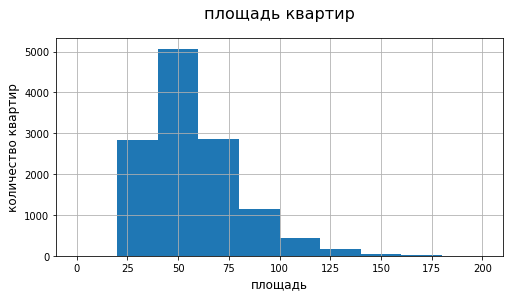

In [332]:
real_data['total_area'].hist(bins = 10, figsize = (8,4), range=(0, 200))
plt.xlabel('площадь',fontsize=12)
plt.ylabel('количество квартир',fontsize=12)
plt.title('площадь квартир',fontsize=16,pad=20);

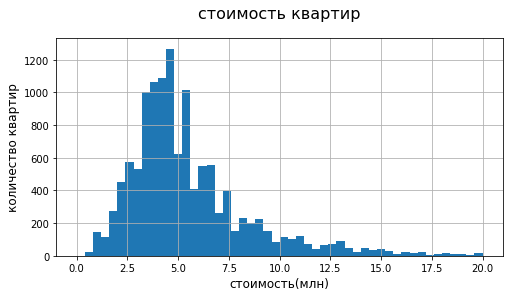

In [333]:
real_data['last_price_mln'].hist(bins = 50,figsize = (8,4), range=(0, 20))
plt.xlabel('стоимость(млн)',fontsize=12)
plt.ylabel('количество квартир',fontsize=12)
plt.title('стоимость квартир',fontsize=16,pad=20);

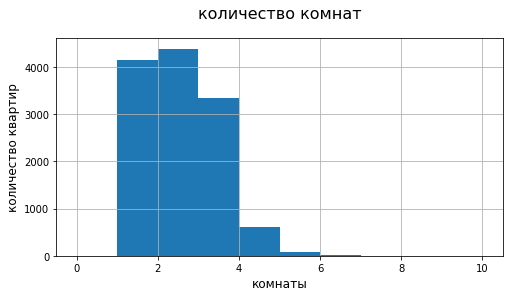

In [334]:
real_data['rooms'].hist(bins = 10, figsize = (8,4), range=(0, 10))
plt.xlabel('комнаты',fontsize=12)
plt.ylabel('количество квартир',fontsize=12)
plt.title('количество комнат',fontsize=16,pad=20);

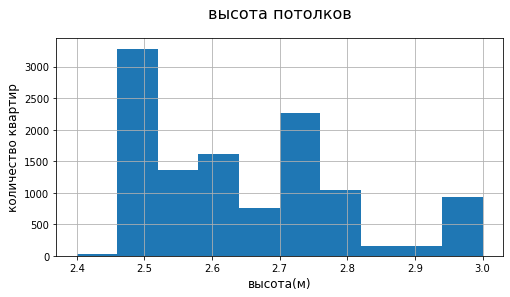

In [335]:
real_data['ceiling_height'].hist(bins = 10, figsize = (8,4),range=(2.4, 3))
plt.xlabel('высота(м)',fontsize=12)
plt.ylabel('количество квартир',fontsize=12)
plt.title('высота потолков',fontsize=16,pad=20);

##### Вывод
Площадь. Три пика, которые, возможно, отражают стандартные размеры квартир с одной, двумя и тремя комнатами. Причем второй пик, который находится в диапазоне от 40 до 60, имеет максимальное значение. Это могут быть как большие однокомнатные квартиры, так и стандартные двухкомнатные.

Цена. Большая часть квартир имеет стоимость около 4 млн. 

Число комнат. Больше всего продается однокомнатных и двухкомнатных квартир. Количество студий очень низкое. Это может говорить о том, что в базе данных присутствует только вторичное жилье. 

Высота потолков. Три пика, которые, возможно, имеют прямое отношение к стоимости жилья. Высота потолков может служить косвенным показателем класса жилья. 

##### 3.2 Изучить время продажи квартиры, построить гистограмму, посчитать среднее и медиану.

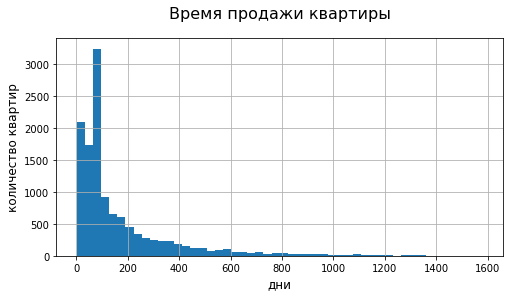

In [336]:
real_data['days_exposition'].hist(bins = 50, figsize = (8,4))
plt.xlabel('дни',fontsize=12)
plt.ylabel('количество квартир',fontsize=12)
plt.title('Время продажи квартиры',fontsize=16,pad=20);

In [337]:
real_data['days_exposition'].describe()

count    12591.000000
mean       172.391311
std        207.515774
min          1.000000
25%         53.000000
50%         95.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64

##### Вывод
Медиана - 95 дней, среднее значение - 169. Такая большая разница значений может свидетельствовать о неоднородности данных и большом количестве выбросов.
Можно считать, что продажа прошла быстро, если квартира продалась менее чем за 45 дней.
Можно считать, что продажа прошла быстро, если квартира продавалась более чем 199 дней.

##### 3.3 Изучить факторы, которые влияют на стоимость квартиры.

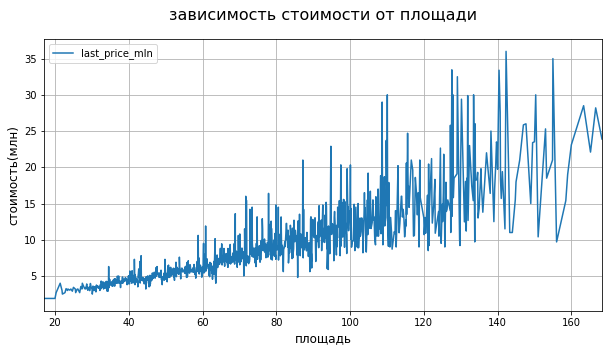

In [389]:
(real_data
        .pivot_table(index='total_area', values='last_price_mln')
        .plot(grid=True, figsize=(10, 5))
)
plt.xlabel('площадь',fontsize=12)
plt.ylabel('стоимость(млн)',fontsize=12)
plt.title('зависимость стоимости от площади',fontsize=16,pad=20);

In [390]:
round(real_data['total_area'].corr(real_data['last_price_mln']),2)

0.79

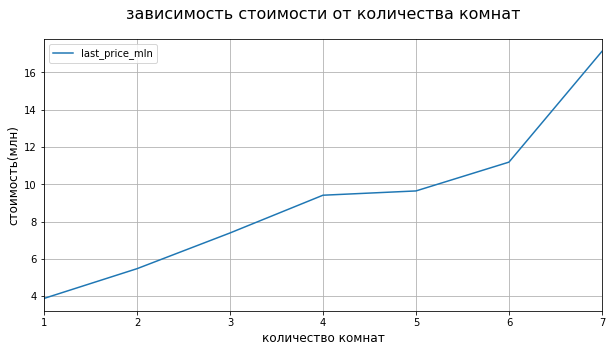

In [340]:
(real_data
        .pivot_table(index='rooms', values='last_price_mln')
        .plot(grid=True, figsize=(10, 5))
)
plt.xlabel('количество комнат',fontsize=12)
plt.ylabel('стоимость(млн)',fontsize=12)
plt.title('зависимость стоимости от количества комнат',fontsize=16,pad=20);

In [341]:
round(real_data['rooms'].corr(real_data['last_price_mln']),2)

0.45

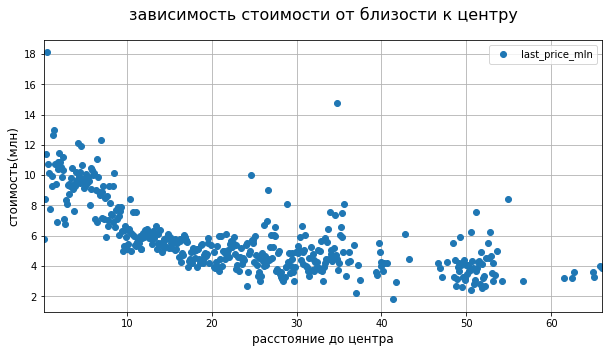

In [342]:
(real_data
        .pivot_table(index='cityCenters_nearest', values='last_price_mln')
        .plot(grid=True, figsize=(10, 5), style = 'o')
)
plt.xlabel('расстояние до центра',fontsize=12)
plt.ylabel('стоимость(млн)',fontsize=12)
plt.title('зависимость стоимости от близости к центру',fontsize=16,pad=20);

In [343]:
round(real_data['cityCenters_nearest'].corr(real_data['last_price_mln']),2)

-0.33

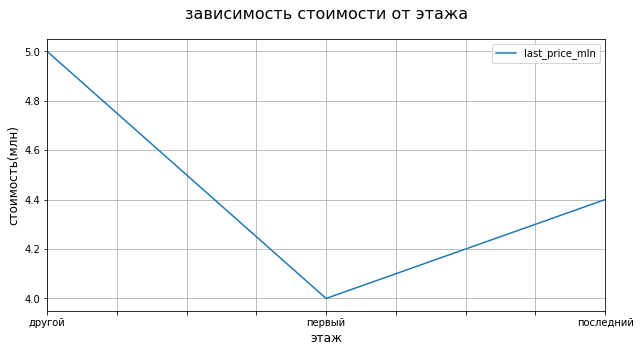

In [346]:
(real_data
        .pivot_table(index='floor_options', values='last_price_mln', aggfunc = 'median')
        .plot(grid=True, figsize=(10, 5) )         
)
plt.xlabel('этаж',fontsize=12)
plt.ylabel('стоимость(млн)',fontsize=12)
plt.title('зависимость стоимости от этажа',fontsize=16,pad=20);

In [356]:
round(real_data['wday_publication'].corr(real_data['last_price_mln']),2)

-0.02

In [357]:
round(real_data['month_publication'].corr(real_data['last_price_mln']),2)

-0.0

In [358]:
round(real_data['year_publication'].corr(real_data['last_price_mln']),2)

-0.02

##### Вывод
Самое сильное влияние на стоимость квартиры оказывает ее площадь, вторым по важности фактором является количество комнат. Влияние на цену так же оказывает и удаленность от центра и этаж. Цена квартиры не зависит от года, месяца или дня недели.

#####     3.4 Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю стоимость квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.

In [360]:
Top_10 = (real_data
                .pivot_table(index= 'locality_name',  values='last_price_mln', aggfunc=['median', 'count'])
)                
Top_10.columns = ['last_price_mln', 'count']
Top_10 = Top_10.sort_values(by = 'count', ascending = False).head(10)

Top_10S = (real_data
                .pivot_table(index= 'locality_name',  values='total_area', aggfunc=['median', 'count'])
)                
Top_10S.columns = ['total_area', 'count']
Top_10S = Top_10S.sort_values(by = 'count', ascending = False).head(10)


Top_10['total_area'] = Top_10S['total_area']
Top_10['mean_price'] = Top_10['last_price_mln'] / Top_10['total_area']

print(Top_10.sort_values(by = 'mean_price', ascending = False))

                   last_price_mln  count  total_area  mean_price
locality_name                                                   
Санкт-Петербург              5.50   8690       54.15    0.101570
Сестрорецк                   5.35    116       54.75    0.097717
Пушкин                       5.10    209       52.80    0.096591
посёлок Парголово            4.20    106       45.05    0.093230
посёлок Мурино               3.80    156       41.80    0.090909
Петергоф                     3.70    134       45.10    0.082040
посёлок Шушары               4.00    200       52.10    0.076775
Колпино                      3.70    193       50.80    0.072835
Гатчина                      3.20    133       47.00    0.068085
Всеволожск                   3.60    246       53.75    0.066977


##### Вывод
Сравнительно невысокая разница в стоимости жилья в Санкт-Петербурге и в пригороде, вероятно, является следствием развитой транспортной инфраструктуры.

##### 3.5 Определить центральную часть Санкт-Петербурга. Создать столбец с расстоянием до центра. Посчитать среднюю цену для каждого километра. Построить график зависимости цены от удаленности от центра. Определить границу, где график сильно меняется — это и будет центральная зона.

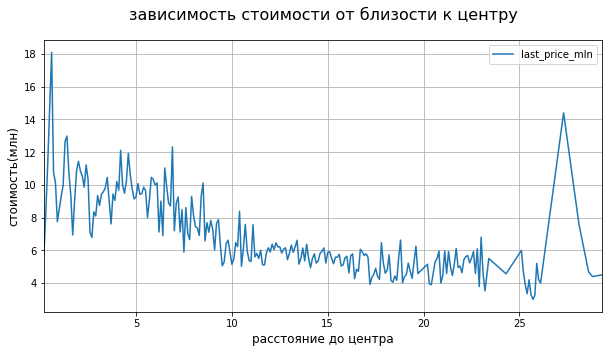

In [371]:
real_data = real_data.query('locality_name == "Санкт-Петербург"')
(real_data
        .pivot_table(index='cityCenters_nearest', values='last_price_mln')
        .plot(grid=True, figsize=(10, 5) )         
)
plt.xlabel('расстояние до центра',fontsize=12)
plt.ylabel('стоимость(млн)',fontsize=12)
plt.title('зависимость стоимости от близости к центру',fontsize=16,pad=20);

##### Вывод
На 12км. от центра города пропадают скачки цен. От 0км до 12км от йентра видны резкие перепады цен. Врзможно, это всязано с тем, что жилой фонд Санкт_петербурга неоднороден и частно можно видеть соседство новостроек с домами возрастом более 50 лет.

#####     3.6 Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [370]:
real_data_center = real_data.query(' 0 < cityCenters_nearest <= 12')

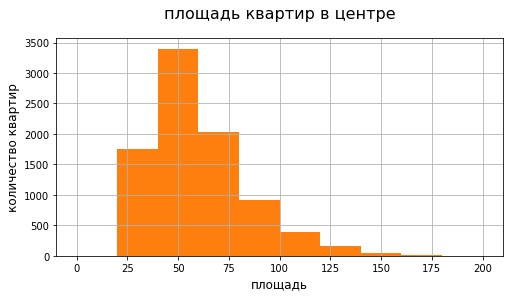

In [409]:
real_data_center['total_area'].hist(bins = 10, figsize = (8,4), range=(0, 200))
plt.xlabel('площадь',fontsize=12)
plt.ylabel('количество квартир',fontsize=12)
plt.title('площадь квартир в центре',fontsize=16,pad=20);

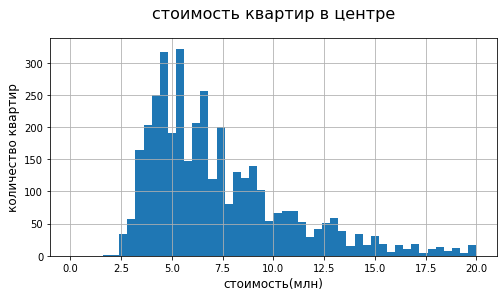

In [386]:
real_data_center['last_price_mln'].hist(bins = 50,figsize = (8,4), range=(0, 20))
plt.xlabel('стоимость(млн)',fontsize=12)
plt.ylabel('количество квартир',fontsize=12)
plt.title('стоимость квартир в центре',fontsize=16,pad=20);

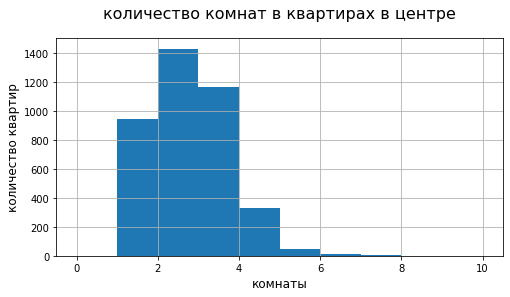

In [408]:
real_data_center['rooms'].hist(bins = 10, figsize = (8,4), range=(0, 10))
plt.xlabel('комнаты',fontsize=12)
plt.ylabel('количество квартир',fontsize=12)
plt.title('количество комнат в квартирах в центре',fontsize=16,pad=20);

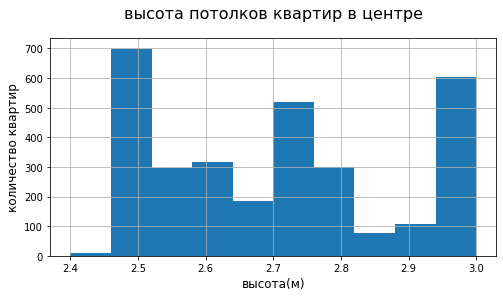

In [407]:
real_data_center['ceiling_height'].hist(bins = 10, figsize = (8,4),range=(2.4, 3))
plt.xlabel('высота(м)',fontsize=12)
plt.ylabel('количество квартир',fontsize=12)
plt.title('высота потолков квартир в центре',fontsize=16,pad=20);

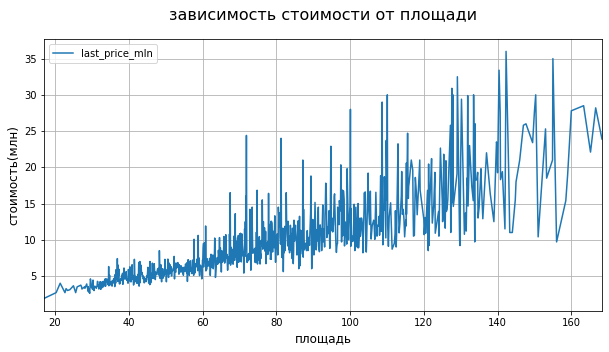

In [392]:
(real_data_center
        .pivot_table(index='total_area', values='last_price_mln')
        .plot(grid=True, figsize=(10, 5))
)
plt.xlabel('площадь',fontsize=12)
plt.ylabel('стоимость(млн)',fontsize=12)
plt.title('зависимость стоимости от площади',fontsize=16,pad=20);

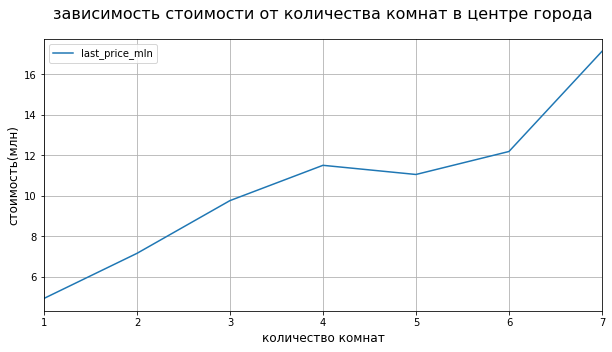

In [396]:
(real_data_center
        .pivot_table(index='rooms', values='last_price_mln')
        .plot(grid=True, figsize=(10, 5))
)
plt.xlabel('количество комнат',fontsize=12)
plt.ylabel('стоимость(млн)',fontsize=12)
plt.title('зависимость стоимости от количества комнат в центре города',fontsize=16,pad=20);

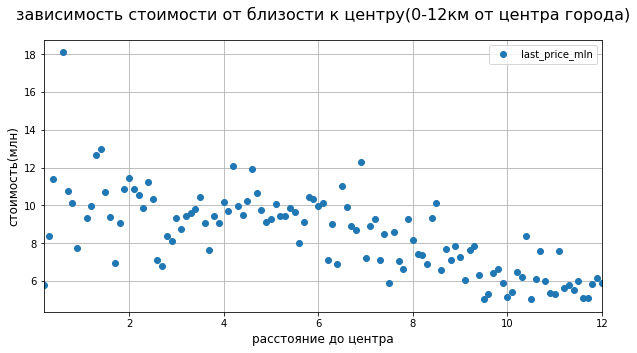

In [397]:
(real_data_center
        .pivot_table(index='cityCenters_nearest', values='last_price_mln')
        .plot(grid=True, figsize=(10, 5), style = 'o')
)
plt.xlabel('расстояние до центра',fontsize=12)
plt.ylabel('стоимость(млн)',fontsize=12)
plt.title('зависимость стоимости от близости к центру(0-12км от центра города)',fontsize=16,pad=20);

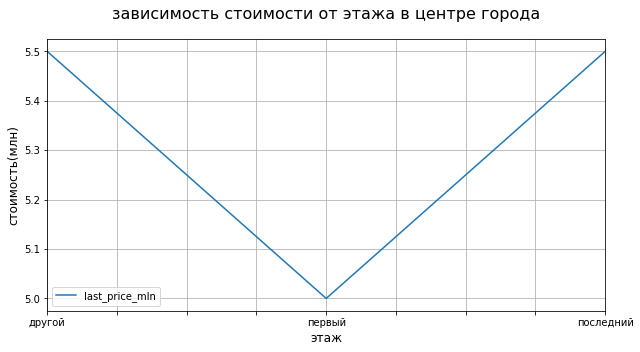

In [398]:
(real_data
        .pivot_table(index='floor_options', values='last_price_mln', aggfunc = 'median')
        .plot(grid=True, figsize=(10, 5) )         
)
plt.xlabel('этаж',fontsize=12)
plt.ylabel('стоимость(млн)',fontsize=12)
plt.title('зависимость стоимости от этажа в центре города',fontsize=16,pad=20);

In [400]:
round(real_data_center['wday_publication'].corr(real_data_center['last_price_mln']),2)

-0.02

In [401]:
round(real_data_center['month_publication'].corr(real_data_center['last_price_mln']),2)

-0.01

In [402]:
round(real_data_center['year_publication'].corr(real_data_center['last_price_mln']),2)

-0.04

##### Вывод
        Средняя площадь квартир в центре С.Петербурга больше, чем в других частях города,потолки выше, выше и средняя стоимость жилья. Как и в остальном городе, самыми массовыми являются двухкомнатные квартиры. Высокое влияние на стоимость жилья оказывает количество комнат, так же влияет и этаж, на котором находится квартира. Удаленность от центра, в самом центральном районе С.Петербурга, оказывает уже меньшее влияние на цену, чем в случае в другимим частями города.
    Рынок недвижимости С.Петербурга неоднороден. С дорогими квартирами в центре и чуть менее дорогими в других частях города. Стандартная квартира, размещенная на сайте имеет следующие характеристики: 52кв.м, 2 комнаты, потолок - 2,65м., 9 этажей в доме, стоимость примерно равна 4,5 млн.руб., продается 95 дней. 